In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
import seaborn as sns

from sleep_eeg.pre_processing.sleep_cycles import *
from sleep_eeg.plotting.sleep_cycles import *
from sleep_eeg.utils import *

In [3]:
mq = load_mq_file()
night_ids = get_night_identifications(mq)
sleep_stage_cycles = get_sleep_stages(night_ids)

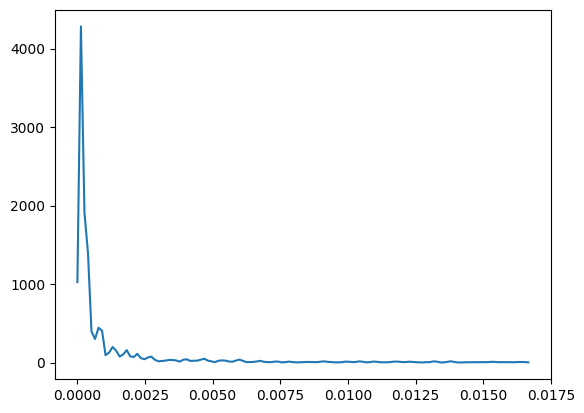

In [4]:
sleep_stage_cycle = sleep_stage_cycles[0]
freq, psd = welch(sleep_stage_cycle, fs=1 / 30)
plt.plot(freq, psd)

In [5]:
sleep_stage_cycle.shape, psd.shape, freq.shape

((891,), (129,), (129,))

A06_N4 freqi[-1]=0.016666666666666666
A06_N5 freqi[-1]=0.016666666666666666
A08_N3 freqi[-1]=0.016666666666666666
A08_N4 freqi[-1]=0.016666666666666666
A08_N5 freqi[-1]=0.016666666666666666
A09_N3 freqi[-1]=0.016666666666666666
A09_N4 freqi[-1]=0.016666666666666666
A09_N5 freqi[-1]=0.016666666666666666
A10_N3 freqi[-1]=0.016666666666666666
A10_N4 freqi[-1]=0.016666666666666666


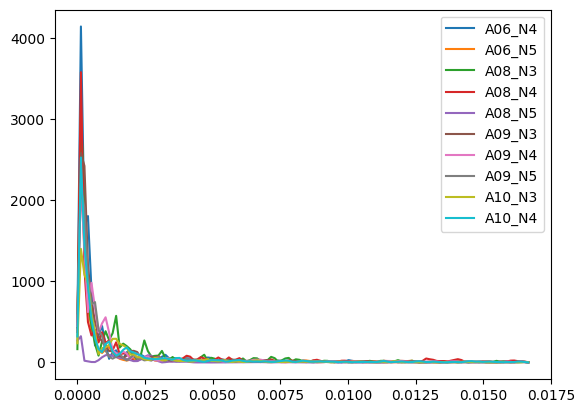

In [6]:
for i in range(10, 20):
    freqi, psdi = welch(sleep_stage_cycles[i], fs=1 / 30)
    print(f"{night_ids[i]} {freqi[-1]=}")
    plt.plot(freqi, psdi, label=night_ids[i])
plt.legend()

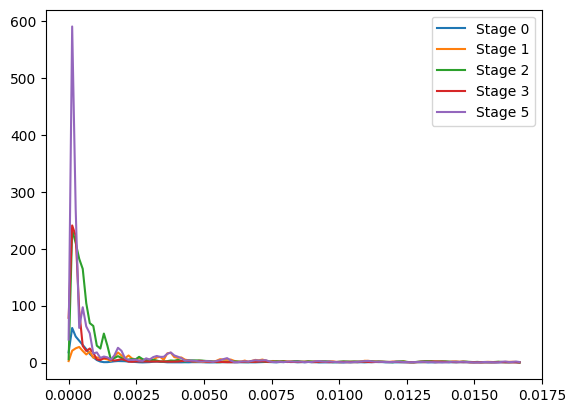

In [7]:
sleep_stage_cycle = sleep_stage_cycles[1]

freq, psd = welch(sleep_stage_cycle, fs=1 / 30)
# plt.plot(freq, psd, label="All")

for i in [0, 1, 2, 3, 5]:
    freq_stage_i, psd_stage_i = welch((sleep_stage_cycle == i).astype(int), fs=1 / 30)
    plt.plot(freq_stage_i, psd_stage_i, label=f"Stage {i}")

plt.legend()

In [10]:
def get_individual_sleep_stage_PSD(
    sleep_stage_cycles: list[np.ndarray], night_ids: list[str]
) -> tuple[pd.DataFrame, np.ndarray]:
    """Create a DataFrame of power spectral densities for each sleep stage of each night

    Args:
        sleep_stage_cycles (list[np.ndarray]): All the sleep stage cycles
        night_ids (list[str]): Each id corresponding to each night in sleep_stage_cycles

    Returns:
        pd.DataFrame: PSD data for each night (rows), each stage and each frequencies (columns)
        np.ndarray: Frequencies corresponding to each `fi` column
    """
    freq, psd = welch(sleep_stage_cycles[0], fs=1 / 30)
    step = freq.shape[0]
    df = pd.DataFrame(
        index=night_ids,
        columns=[
            f"stage_{i}_psd_f{j}" for i in [0, 1, 2, 3, 5] for j, _ in enumerate(freq)
        ],
    )
    for i, sleep_stage_cycle in enumerate(sleep_stage_cycles):
        for j, stage_i in enumerate([0, 1, 2, 3, 5]):
            freq_stage_i, psd_stage_i = welch(
                (sleep_stage_cycle == stage_i).astype(int), fs=1 / 30
            )
            df.iloc[i, j * step : (j + 1) * step] = psd_stage_i
    return df.astype(float), freq


df, _ = get_individual_sleep_stage_PSD(sleep_stage_cycles, night_ids)

In [11]:
df

,stage_0_psd_f0,stage_0_psd_f1,stage_0_psd_f2,stage_0_psd_f3,stage_0_psd_f4,stage_0_psd_f5,stage_0_psd_f6,stage_0_psd_f7,stage_0_psd_f8,stage_0_psd_f9,...,stage_5_psd_f119,stage_5_psd_f120,stage_5_psd_f121,stage_5_psd_f122,stage_5_psd_f123,stage_5_psd_f124,stage_5_psd_f125,stage_5_psd_f126,stage_5_psd_f127,stage_5_psd_f128
A01_N3,31.125790,216.428136,103.417866,69.989868,41.157145,25.567952,20.011619,13.824295,4.088862,4.285878,...,0.244743,0.204442,0.137974,0.108862,0.134413,0.251085,0.512203,0.481998,0.228936,0.060657
A01_N4,17.986797,60.781684,45.749304,38.427105,31.376579,23.516360,15.236869,9.158611,4.406285,1.734086,...,0.918433,0.614554,0.364766,0.396846,1.349814,1.814723,0.858537,1.085011,1.764989,0.912227
A01_N5,35.073075,100.147964,50.868389,46.354775,43.414416,33.418384,22.565340,14.552902,10.953162,8.152405,...,0.040446,0.023117,0.033006,0.057570,0.065488,0.046637,0.024918,0.027673,0.050862,0.032211
A02_N3,10.610658,173.212635,101.824587,27.371146,15.388068,4.388552,12.205796,10.244988,11.229499,10.336939,...,0.047320,0.053045,0.080499,0.097009,0.230573,0.208826,0.391984,0.284713,0.270291,0.076893
A02_N4,7.712942,56.110100,42.618653,34.697681,26.247546,16.476155,11.474115,4.029572,2.025488,1.041260,...,0.252777,0.281192,0.183799,0.131277,0.416713,0.806131,0.661086,0.439515,0.165407,0.018987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B23_N4,0.380331,0.719852,0.559691,0.222142,0.100289,0.563327,0.315805,0.644383,0.326306,0.375364,...,0.234074,0.243579,0.257033,0.396078,0.407390,0.380238,0.438017,0.442202,0.516889,0.236628
B23_N5,21.651989,92.328102,92.160154,59.987543,30.131377,11.123134,1.867807,1.754107,4.115276,5.741927,...,0.544004,0.576029,0.503848,0.595205,0.269768,0.442526,0.418113,0.453966,0.727003,0.324474
B24_N3,6.517027,41.476300,63.995221,64.414528,48.769528,38.055793,25.559953,22.056980,14.205577,11.423766,...,0.294718,0.199237,0.193363,0.158860,0.112698,0.188446,0.156319,0.369768,0.247270,0.243477
B24_N4,9.686523,23.263641,40.173176,34.017024,24.493225,23.535215,20.875904,26.285866,21.244966,18.946645,...,0.992306,0.412360,0.910942,1.436861,1.399726,1.678658,1.054318,0.435672,1.178159,0.489895


In [12]:
df.describe()

,stage_0_psd_f0,stage_0_psd_f1,stage_0_psd_f2,stage_0_psd_f3,stage_0_psd_f4,stage_0_psd_f5,stage_0_psd_f6,stage_0_psd_f7,stage_0_psd_f8,stage_0_psd_f9,...,stage_5_psd_f119,stage_5_psd_f120,stage_5_psd_f121,stage_5_psd_f122,stage_5_psd_f123,stage_5_psd_f124,stage_5_psd_f125,stage_5_psd_f126,stage_5_psd_f127,stage_5_psd_f128
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,16.366635,83.434142,51.243181,31.476346,20.829234,14.217933,10.356341,8.807670,7.085391,6.020549,...,0.375939,0.367169,0.376345,0.390775,0.394813,0.401008,0.364015,0.357320,0.375178,0.183083
std,19.025019,95.000590,71.431441,43.804464,22.340165,12.088849,6.668763,6.241191,4.874863,5.022741,...,0.452709,0.460233,0.495096,0.583483,0.614406,0.514864,0.370679,0.313127,0.386987,0.215108
min,0.037140,0.396593,0.016100,0.015551,0.014812,0.013915,0.012892,0.011781,0.010620,0.009446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.453567,18.101633,10.351219,9.619632,7.434540,6.551143,5.597286,4.257084,3.777121,3.441486,...,0.131123,0.113599,0.134687,0.144238,0.127478,0.160107,0.151311,0.137827,0.133931,0.052736
50%,10.100325,46.807088,28.639192,23.291351,17.179155,12.390601,9.706567,8.103974,6.335498,4.780690,...,0.234074,0.255983,0.234421,0.238426,0.239527,0.251085,0.268663,0.286888,0.252808,0.107942
75%,21.487908,109.005074,65.270395,42.029991,26.175384,17.865448,12.756330,10.850400,8.349365,7.460299,...,0.426796,0.405603,0.423018,0.456298,0.445771,0.438754,0.445990,0.480724,0.510132,0.240069
max,111.310359,388.284788,658.064238,447.883481,213.957982,102.239508,33.170651,34.532321,25.834847,38.961860,...,2.350326,2.764726,4.342529,5.730782,6.131277,4.272726,2.633903,1.919776,2.226575,1.176428


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

rmse = make_scorer(
    lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)
)


np.mean(
    cross_val_score(LinearRegression(), df, mq["mq_4_calm_sleep"], cv=127, scoring=rmse)
)

22.813206295903758

In [26]:
from sklearn.ensemble import AdaBoostRegressor

np.mean(
    cross_val_score(
        AdaBoostRegressor(), df, mq["mq_4_calm_sleep"], cv=127, scoring=rmse
    )
)

16.884272917100137